<h1>Experiment 5</h1>

### Objective
<h4> WAP  to  train  and  evaluate  a  convolutional  neural  network  using  Keras  Library  to
classify  MNIST  fashion  dataset.  Demonstrate  the  effect  of  filter  size,  regularization,
batch size and optimization algorithm on model performance. </h4>


This project implements a **Convolutional Neural Network (CNN)** using TensorFlow and Keras to classify images from the **Fashion MNIST** dataset.



### Dataset
- **Dataset:** Fashion MNIST (28x28 grayscale images across 10 classes)
- **Preprocessing:**
  - Normalized pixel values to [0, 1]
  - Reshaped to (28, 28, 1)
  - One-hot encoded the labels
  - Used 'ImageDataGenerator' for data augmentation:

###  Model Architecture

- **Input Layer:** (28, 28, 1)
- **Conv Block 1:**
  - 2 × Conv2D → BatchNorm → ReLU
  - MaxPooling2D
  - Dropout
- **Conv Block 2 (Residual Block):**
  - 2 × Conv2D → BatchNorm → Add(Shortcut) → ReLU
  - MaxPooling2D
  - Dropout
- **Conv Block 3:**
  - Conv2D
  - GlobalAveragePooling2D
- **Dense Layers:**
  - Dense(512) → BatchNorm → ReLU → Dropout
  - Output: Dense(10) with Softmax


### Training Hyperparameters

- **Optimizer:** 'Adam' with Exponential Learning Rate Decay
- **Loss Function:** 'CategoricalCrossentropy' with 'label_smoothing=0.1'

### Evaluation

- Loads the best saved model weights using 'ModelCheckpoint'.
- Evaluates on the test set
- Plots training and validation loss and accuracy over epochs


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.6542 - loss: 1.4884 - val_accuracy: 0.8234 - val_loss: 0.6053
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.8070 - loss: 0.6516 - val_accuracy: 0.8506 - val_loss: 0.5346
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 59ms/step - accuracy: 0.8297 - loss: 0.5865 - val_accuracy: 0.8658 - val_loss: 0.4886
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 55ms/step - accuracy: 0.8413 - loss: 0.5528 - val_accuracy: 0.8715 - val_loss: 0.4624
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.8500 - loss: 0.5250 - val_accuracy: 0.8771 - val_loss: 0.4549
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 59ms/step - accuracy: 0.8560 - loss: 0.5118 - val_accuracy: 0.8805 - val_loss: 0.4366
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 56ms/step - accuracy: 0.8656 - loss: 0.4895 - val_accuracy: 0.8794 - val_loss: 0.4389
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.8668 - loss: 0.4804 - 

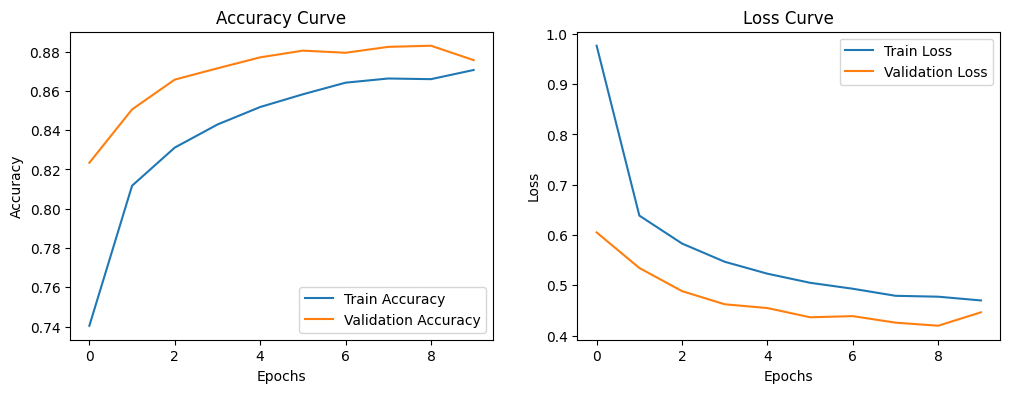

In [1]:
# Python Implementation

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
def build_model(filter_size=3, regularization=None, optimizer='adam'):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (filter_size, filter_size), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (filter_size, filter_size), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and Dense layers
    model.add(layers.Flatten())
    if regularization:
        model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularization))
    else:
        model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Experiment with different hyperparameters
batch_size = 64
epochs = 10

# Example: Using filter size 3, L2 regularization, and Adam optimizer
model = build_model(filter_size=3, regularization=regularizers.l2(0.01), optimizer='adam')

# Train the model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

<h2>Code Description</h2>
Dataset<br>
Fashion MNIST: Comprises 28x28 grayscale images representing 10 different clothing categories.<br>
Classes: 10 fashion categories (T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot).<br>
Preprocessing:<br>
Pixel values are normalized to the range [0, 1] by dividing by 255.<br>
Data is reshaped from (28, 28) to (28, 28, 1) for CNN compatibility.<br>
Labels are one-hot encoded using to categorical.<br>
<br>

Model Architecture<br>
Input Layer: Accepts input images of shape (28, 28, 1).<br>
Convolutional Layers:<br>
Conv Layer 1: 32 filters of size (3x3), ReLU activation.<br>
MaxPooling: (2x2) pooling to reduce spatial dimensions.<br>
Conv Layer 2: 64 filters of size (3x3), ReLU activation.<br>
MaxPooling: (2x2) pooling again for spatial reduction.<br>
Fully Connected Layers:<br>
Flatten layer to convert 2D features to 1D.<br>
Dense(128) layer with ReLU activation. Optional L2 Regularization can be applied via kernel_regularizer=regularizers.l2(0.01).<br>
Dropout(0.5) to prevent overfitting.<br>
Final Dense(10) layer with Softmax activation for output classification.<br>


Training Strategy<br>
Optimizer: Adam optimizer is used for efficient training.<br>
Loss Function: Categorical Crossentropy (suitable for multi-class classification).<br>
Metrics: Model performance is tracked using accuracy.<br>


Training<br>
Model is trained on preprocessed training data.<br>
A validation split of 20% is used to monitor generalization.<br>
Training is performed for 10 epochs with a batch size of 64.<br>
Training and validation accuracy/loss curves are plotted for performance visualization.<br>


Evaluation<br>
Model performance is evaluated on the test dataset.<br>
Final Test Accuracy is printed.<br>
Accuracy and loss trends over epochs are visualized using matplotlib.<br>





### Performance Evaluation
- **Accuracy**: The test accuracy achieved is printed after evaluation.
- **Loss Curve**: The training and validation loss curves are plotted to visualize convergence.
- **Accuracy Curve**: The training and validation accuracy curves are plotted to observe learning progress.


<h2>My Comments :-</h2>

<ul>
<li>The maximum test accuracy achieved is 88.53.</li><br>
<li>Adding the Batch Normalisation and dropout layers along with applying the data augmentation proved effective in bringing around 95% accuracy.</li><br>
<li>Additionally in the previous model the gap between the validation and training set was prominent indicating model overtraining which is reduced to a significant extent in this model eventually fixing the problem of model overtraining.</li>